In [1]:
import matplotlib.pyplot as plt
from train import game
from tic_tac_toe_environment import TicTacToeEnvironment
from agent import Agent

In [2]:
env = TicTacToeEnvironment(Agent('o'))
agent = Agent('x', learning_rate=1., eps=.5)

In [3]:
xcount = 0
ocount = 0
ties_count = 0
for _ in range(1_000):
    res = game(env, agent, train=True)
    match res:
        case 'x':
            xcount += 1
        case 'o':
            ocount += 1
        case 'tie':
            ties_count += 1
        case _:
            print(res)

In [4]:
xcount, ocount, ties_count

(528, 405, 67)

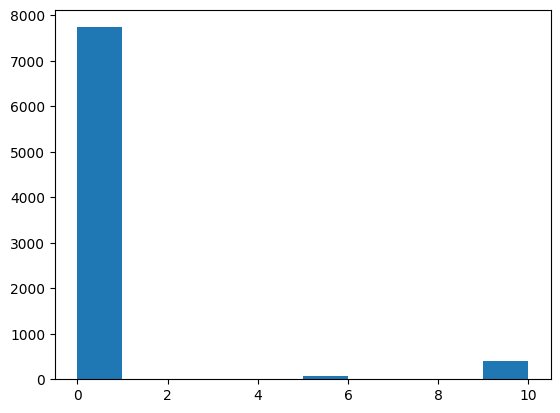

In [5]:
plt.hist([max(v.values()) for v in agent.qtable.values()]);

In [7]:
env = TicTacToeEnvironment(Agent('o'))
agent = Agent('x')

In [10]:
num_iter = 1000
results = {}

for i in range(num_iter):
    env.reset()
    next_state = env.board
    while True:
        state = next_state
        action = agent.sample_action(state)
        next_state, reward, winner, tie = env.step(action)
        if winner or tie:
            break
        
    if reward not in results:
        results[reward] = 0
    results[reward] += 1


In [11]:
results

{-10.0: 415, 10.0: 511, 5.0: 74}